In [53]:
# import necessary modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import house_sales_data as hsd
from sklearn.model_selection import train_test_split


In [7]:
## Sacramento house price data; load
data = hsd.house_sales_data() 
print(data.keys())

## Get the target (i.e., price) and two features
price = data["price"]
area = data["area"]
beds = data["beds"]


dict_keys(['price', 'area', 'beds', 'baths', 'condo', 'location'])


In [54]:
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalising the data

In [16]:
def normalize_data(X, y, normalize_cols):
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    return min_X, max_X, min_y, max_y

X = np.array([area, beds, np.ones(area.shape[0])]).T
y = price
ranges = normalize_data(X, y, [True, True, False])

### Implementing Gradient Descent

In [21]:
def gradient_descent(X, y, max_iteration, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    costs = np.zeros(max_iteration)
    
    for t in range(max_iteration):
        grad = np.zeros(n)
        for i in range(m):
            y_hat = X[i] @ theta
            loss = (y_hat - y[i])**2
            costs[t] = costs[t] + 1/m * loss
            for j in range(n):
                der = 2 * (y_hat - y[i])*X[i,j]
                grad[j] = grad[j] + 1/m * der
        theta = theta - learning_rate * grad
    return theta, costs
    

In [45]:
#checking with a user-input learning rate and iteration

theta,costs = gradient_descent(X,y,250,0.05)
theta,costs

(array([0.34951078, 0.1695357 , 0.09900797]),
 array([0.10325909, 0.08457779, 0.07038168, 0.05959007, 0.0513827 ,
        0.04513695, 0.04038025, 0.03675389, 0.0339856 , 0.03186872,
        0.0302464 , 0.02899956, 0.02803783, 0.02729262, 0.02671185,
        0.02625601, 0.02589509, 0.02560633, 0.02537243, 0.02518029,
        0.02501993, 0.02488381, 0.02476617, 0.02466267, 0.02456999,
        0.02448563, 0.02440767, 0.02433467, 0.02426553, 0.02419941,
        0.02413568, 0.02407386, 0.02401357, 0.02395455, 0.02389657,
        0.02383948, 0.02378314, 0.02372748, 0.0236724 , 0.02361787,
        0.02356383, 0.02351026, 0.02345712, 0.02340439, 0.02335207,
        0.02330014, 0.02324858, 0.0231974 , 0.02314657, 0.0230961 ,
        0.02304599, 0.02299621, 0.02294679, 0.0228977 , 0.02284895,
        0.02280053, 0.02275244, 0.02270467, 0.02265723, 0.02261012,
        0.02256332, 0.02251684, 0.02247068, 0.02242482, 0.02237928,
        0.02233404, 0.02228911, 0.02224448, 0.02220016, 0.02215613,
  

In [44]:
# Implement an evaluation metric for regression
y_hat = X@theta
def evaluation_metric(y,y_hat):
    return np.mean(np.square(y_hat-y))

In [ ]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# call gradient descent and fine-tune your learning rate

gradient_descent(X,y,250,0.1)

(array([0.49867702, 0.15770102, 0.06108265]),
 array([0.10325909, 0.06845834, 0.04921421, 0.03854616, 0.03260631,
        0.02927359, 0.0273788 , 0.02627744, 0.02561422, 0.02519329,
        0.02490668, 0.02469486, 0.02452501, 0.02437902, 0.0242469 ,
        0.02412314, 0.02400468, 0.02388984, 0.02377766, 0.02366762,
        0.02355942, 0.02345287, 0.02334789, 0.02324438, 0.02314232,
        0.02304166, 0.02294238, 0.02284445, 0.02274785, 0.02265256,
        0.02255855, 0.02246582, 0.02237434, 0.0222841 , 0.02219506,
        0.02210723, 0.02202058, 0.02193508, 0.02185074, 0.02176752,
        0.02168542, 0.02160441, 0.02152448, 0.02144562, 0.02136781,
        0.02129103, 0.02121527, 0.02114051, 0.02106674, 0.02099395,
        0.02092212, 0.02085124, 0.02078128, 0.02071225, 0.02064413,
        0.0205769 , 0.02051055, 0.02044506, 0.02038044, 0.02031665,
        0.0202537 , 0.02019156, 0.02013023, 0.02006969, 0.02000994,
        0.01995096, 0.01989275, 0.01983528, 0.01977855, 0.01972255,
  

In [49]:
# plot cost vs iterations 
# note gradient descent return costs for all iterations

def error(iters):
    err=[]
    m1=0.
    m2=0.
    c=0.
    alpha=0.01
    for i in range(iters):
        y_pred = m1*X.T[0] + m2*X.T[1] + c
        errterm = np.mean((y-y_pred)**2)
        err.append(errterm)
        Dm1 = (-2/float(len(X.T[0])))*sum(X.T[0]*(y-y_pred))
        Dm2 = (-2/float(len(X.T[1])))*sum(X.T[1]*(y-y_pred))
        Dc = (-2/float(len(X.T[0])))*sum(y-y_pred)
        m1 = m1 - alpha*Dm1
        m2 = m2 - alpha*Dm2
        c = c - alpha*Dc
    return np.array(err)

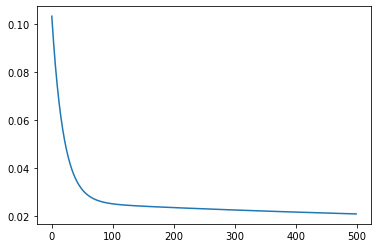

In [50]:
plt.plot(np.arange(500),error(500))

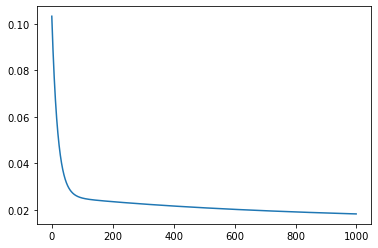

In [42]:
plt.plot(np.arange(1000),error(1000))

In [59]:
# print evaluation metric for test set while 
# changing max_iteration from 500 to 2000
# Note the best value of evaluation metric you get

y_hat1 = X_test@theta
evaluation_metric(y_test,y_hat1)

0.016416994182125593

In [ ]:
# compare your solution with scikit-learn library
from sklearn import datasets, linear_model

In [61]:
# Create linear regression object

model = LinearRegression()


In [ ]:
# Train the model using the training sets

model.fit(X_train,y_train)


In [63]:
# Predict on test set and print evaluation metric
# How much does it differ by from 

model.fit(X_train,y_train)
y_predicted = model.predict(X_test)
y_predicted

array([0.33279794, 0.19847744, 0.46143228, 0.28216527, 0.26391927,
       0.13461642, 0.47808176, 0.16222921, 0.56476599, 0.18912636,
       0.25253123, 0.13416027, 0.21603922, 0.36291956, 0.2372502 ,
       0.24318015, 0.21079349, 0.35216861, 0.19461587, 0.25890162,
       0.14784477, 0.40420115, 0.28674249, 0.40006437, 0.23040795,
       0.20851274, 0.43701253, 0.24477667, 0.27305798, 0.25411204,
       0.19368786, 0.26141044, 0.14693247, 0.32619947, 0.17840683,
       0.31820113, 0.25618043, 0.38297445, 0.17110843, 0.24590134,
       0.15444324, 0.41034346, 0.25435583, 0.13736903, 0.47899406,
       0.29837432, 0.3360067 , 0.33576291, 0.26142615, 0.19187897,
       0.20668814, 0.18935443, 0.28423366, 0.35014736, 0.30546035,
       0.42240002, 0.43132637, 0.15537125, 0.13966549, 0.26165423,
       0.15651162, 0.23840628, 0.26802462, 0.17658223, 0.47262367,
       0.1503536 , 0.16268536, 0.18000336, 0.51160879, 0.41446452,
       0.14626396, 0.38732359, 0.32072567, 0.24296779, 0.33188